In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("loan.csv", encoding='latin1')
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail
0,2,2,2,0.0,0.0,0.0,36 months,0.00,0.00,< 1 year,...,1.0,0.000000,0.00,0.00,0.00,Jan-07,0.00,Jan-07,Jan-07,1
1,3,545583,703644,2500.0,2500.0,2500.0,36 months,13.98,85.42,4 years,...,10.0,3075.291779,3075.29,2500.00,575.29,Jul-13,90.85,Aug-13,Jun-16,0
2,4,532101,687836,5000.0,5000.0,5000.0,36 months,15.95,175.67,4 years,...,15.0,2948.760000,2948.76,1909.02,873.81,Nov-11,175.67,NaN,Mar-12,1
3,5,877788,1092507,7000.0,7000.0,7000.0,36 months,9.91,225.58,10+ years,...,20.0,8082.391880,8082.39,7000.00,1082.39,Mar-14,1550.27,NaN,Mar-14,0
4,6,875406,1089981,2000.0,2000.0,2000.0,36 months,5.42,60.32,10+ years,...,15.0,2161.663244,2161.66,2000.00,161.66,Feb-14,53.12,NaN,Jun-16,0


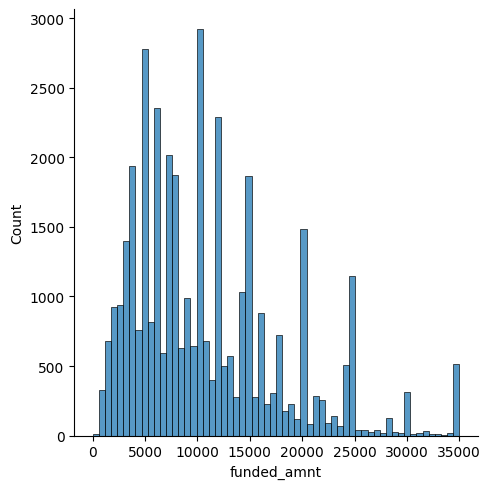

In [14]:
import seaborn as sns 
sns.displot(df['funded_amnt'])

<Axes: ylabel='funded_amnt'>

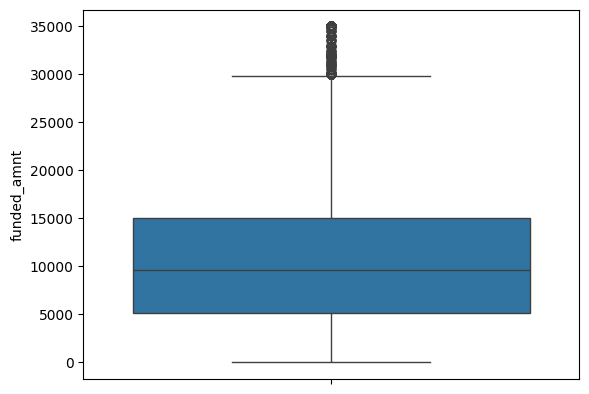

In [15]:
#to see outliers clearly 
sns.boxplot(df['funded_amnt'])

In [11]:
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,repay_fail
count,38480.000000,3.848000e+04,3.848000e+04,38479.000000,38479.000000,38479.000000,38480.00000,38479.000000,3.847800e+04,38480.000000,...,38479.000000,38479.000000,3.847600e+04,38479.000000,38479.000000,38479.000000,38479.000000,38479.000000,38479.000000,38480.000000
mean,19240.500000,6.649979e+05,8.261899e+05,11094.727644,10831.856337,10150.141518,12.16430,323.163255,6.899531e+04,13.378119,...,9.342966,0.057902,1.428987e+04,22.108501,11980.696892,11274.519569,9646.412705,2232.768235,2614.441757,0.151481
std,11108.363516,2.192322e+05,2.793531e+05,7405.416042,7146.853682,7128.026828,3.73744,209.089097,6.447639e+04,6.744356,...,4.498075,0.245707,2.194138e+04,11.588602,9006.505205,8946.229941,7051.828302,2570.177312,4391.969583,0.358522
min,1.000000,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9620.750000,4.983645e+05,6.384620e+05,5200.000000,5100.000000,4950.000000,9.62000,165.740000,4.000000e+04,8.200000,...,6.000000,0.000000,3.639750e+03,13.000000,5463.099238,4811.735000,4400.000000,657.700000,212.010000,0.000000
50%,19240.500000,6.443195e+05,8.242545e+05,9750.000000,9600.000000,8495.792749,11.99000,277.980000,5.865000e+04,13.485000,...,9.000000,0.000000,8.839500e+03,20.000000,9673.221341,8953.240000,8000.000000,1335.090000,526.000000,0.000000
75%,28860.250000,8.265608e+05,1.034706e+06,15000.000000,15000.000000,14000.000000,14.72000,429.350000,8.200000e+04,18.690000,...,12.000000,0.000000,1.726550e+04,29.000000,16402.394995,15486.925000,13315.100000,2795.020000,3169.815000,0.000000
max,38480.000000,1.077430e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,100.99000,1305.190000,6.000000e+06,100.000000,...,47.000000,5.000000,1.207359e+06,90.000000,58563.679930,58563.680000,35000.020000,23611.100000,36115.200000,1.000000


In [17]:
upper_limit=df['funded_amnt'].mean()+3*df['funded_amnt'].std()
lower_limit=df['funded_amnt'].mean()-3*df['funded_amnt'].std()
print("upper limit",upper_limit)
print("lower limit",lower_limit)

upper limit 32272.417383982025
lower limit -10608.704709536225


In [22]:
df.loc[(df['funded_amnt']>upper_limit) | (df['funded_amnt']<lower_limit)]

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail
50,52,740505,938229,35000.0,35000.0,28825.00602,60 months,21.74,961.50,NaN,...,26.0,12320.78000,10145.25,2787.92,4894.00,Jan-12,961.50,NaN,Jun-12,1
135,136,833971,1043707,35000.0,35000.0,34975.00000,60 months,18.39,896.22,10+ years,...,20.0,30469.08000,30447.32,15598.65,14870.43,Jul-14,496.22,NaN,Jun-16,1
161,162,832490,1041891,35000.0,35000.0,35000.00000,60 months,21.36,953.97,9 years,...,63.0,5721.30000,5721.30,2075.40,3645.90,Feb-12,953.97,NaN,Jun-16,1
325,326,950998,1171749,35000.0,35000.0,34750.00000,60 months,11.71,773.44,10+ years,...,42.0,25295.29000,25114.57,14381.90,8024.91,Apr-14,773.44,NaN,Sep-14,1
554,555,812537,1019701,35000.0,35000.0,34977.34674,60 months,21.67,960.11,6 years,...,25.0,45377.15657,45315.51,35000.01,10377.15,May-13,29063.76,NaN,Nov-15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37965,37966,975107,1198008,34475.0,34475.0,34475.00000,60 months,14.27,807.01,10+ years,...,46.0,36114.92000,36114.92,34475.00,1639.92,Mar-12,36115.20,NaN,Mar-12,0
38160,38161,1028819,1258172,35000.0,35000.0,35000.00000,36 months,7.90,1095.16,10+ years,...,35.0,39322.49746,39322.50,35000.00,4322.50,Oct-14,2845.86,NaN,Jun-16,0
38293,38294,936696,1157447,35000.0,35000.0,34975.00000,60 months,20.89,944.71,4 years,...,29.0,50272.83731,50236.93,35000.00,15272.84,May-14,22891.14,NaN,Jun-16,0
38375,38376,987985,1212191,35000.0,35000.0,35000.00000,60 months,11.71,773.44,2 years,...,32.0,45824.93997,45824.94,35000.00,10824.94,Oct-15,10260.65,NaN,Oct-15,0


In [26]:
#trimming-delete the outlier data
new_df=df.loc[(df['funded_amnt']<upper_limit) | (df['funded_amnt']>lower_limit)]
print("Before removing outliers :",len(df))
print("After removing outliers :",len(new_df))
print("Outliers",len(df)-len(new_df))

Before removing outliers : 38480
After removing outliers : 38479
Outliers 1


<Axes: ylabel='funded_amnt'>

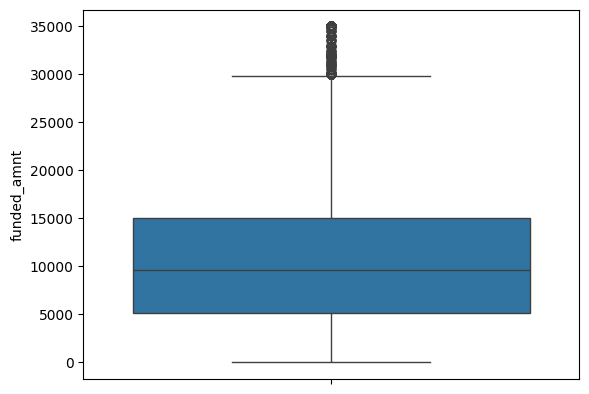

In [29]:
sns.boxplot(new_df['funded_amnt'])

In [31]:
#Capping-change the outlier values to upper or lower limit values
new_df=df.copy()
new_df.loc[(new_df['funded_amnt']>upper_limit),'funded_amnt']=upper_limit
new_df.loc[(new_df['funded_amnt']<lower_limit),'funded_amnt']=lower_limit


<Axes: ylabel='funded_amnt'>

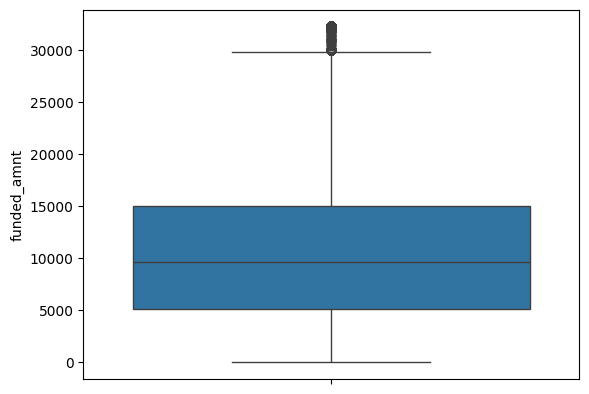

In [32]:
sns.boxplot(new_df['funded_amnt'])